# Exercise 3
## Binary Search Tree Implementation

In [111]:
class Tree:
    def __init__(self, value=None, data=None):
        self._value = value
        self._data = data
        self.left = None
        self.right = None

    def add(self, value, data):
        if self._value is None:  # The tree is empty
            self._value = value
            self._data = data
        else:
            if value < self._value:
                if self.left is None:
                    self.left = Tree(value, data)
                else:
                    self.left.add(value, data)
            elif value > self._value:
                if self.right is None:
                    self.right = Tree(value, data)
                else:
                    self.right.add(value, data)
            else:  # value already exists in the tree
                self._data = data  # We can choose to overwrite the data or ignore

In [112]:
# Testing the implementation
my_tree = Tree()
for patient_id, initials in [(24601, "JV"), (42, "DA"), (7, "JB"), (143, "FR"), (8675309, "JNY")]:
    my_tree.add(patient_id, initials)

## Adding the `__contains__` Method to our Binary Search Tree

In [113]:
def __contains__(self, patient_id):
      if self._value == patient_id:
        return True
      elif self.left and patient_id < self._value:
        return patient_id in self.left
      elif self.right and patient_id > self._value:
        return patient_id in self.right
      else:
        return False
Tree.__contains__ = __contains__

In [114]:
# Test cases
print(24601 in my_tree)  # True
print(1492 in my_tree)   # False

True
False


## `has_data` function for the `Tree` class

In [115]:
# External function to check data
def has_data(tree, target_data):
    if tree is None:
        return False

    if tree._data == target_data:
        return True

    # Check left subtree
    if has_data(tree.left, target_data):
        return True

    # Check right subtree
    return has_data(tree.right, target_data)

In [116]:
# Test the has_data function
print(has_data(my_tree, "JV"))   # True
print(has_data(my_tree, "DA"))   # True
print(has_data(my_tree, "ZZ"))   # False
print(has_data(my_tree, "JNY"))  # True

True
True
False
True


## Demonstrating the Performance of `in` operation vs. `has_data` function

### 1. & 2. Generating Trees with Random Data

We'll use Python's `random` module to generate random `patient_ids` and `data`.

In [117]:
import random
import string

def random_string(length=2):
    """Generate a random string of fixed length."""
    letters = string.ascii_uppercase
    return ''.join(random.choice(letters) for _ in range(length))

def generate_random_tree(size):
    """Generate a tree with random patient_ids and data."""
    tree = Tree()
    for _ in range(size):
        patient_id = random.randint(1, 1000000)
        data = random_string()
        tree.add(patient_id, data)
    return tree

### 3. Measure Timings

We'll use Python's `timeit` module to measure how long it takes to perform the operations.

In [118]:
import timeit

def measure_time(tree, operation, value):
    start_time = timeit.default_timer()
    operation(tree, value)
    end_time = timeit.default_timer()
    return end_time - start_time

### 4. Plotting the Timings

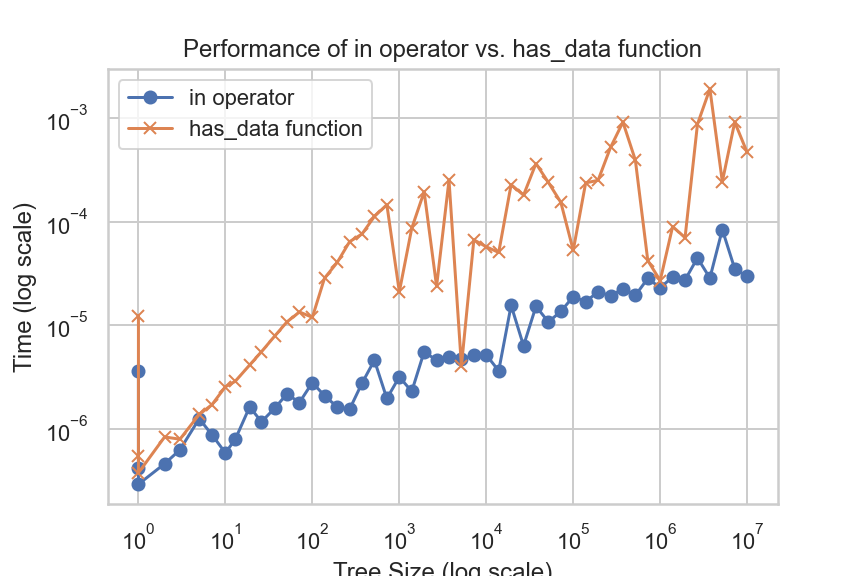

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Tree sizes to test
#sizes = [10, 100, 1000, 5000, 10000, 50000]
sizes = np.logspace(0,7, num=50, dtype=int, base=10)
# Collect timings
in_timings = []
has_data_timings = []

for size in sizes:
    tree = generate_random_tree(size)
    patient_id = random.randint(1, 1000000)
    data = random_string()

    in_time = measure_time(tree, lambda t, v: v in t, patient_id)
    has_data_time = measure_time(tree, has_data, data)

    in_timings.append(in_time)
    has_data_timings.append(has_data_time)

# Plotting
plt.loglog(sizes, in_timings, marker='o', label="in operator")
plt.loglog(sizes, has_data_timings, marker='x', label="has_data function")
plt.xlabel("Tree Size (log scale)")
plt.ylabel("Time (log scale)")
plt.title("Performance of in operator vs. has_data function")
plt.legend()
plt.show()

--------------------------------------------------------
The second thoughts

In [98]:
class Tree:
    def __init__(self):
        self._value = None
        self.left = None
        self.right = None

    def add(self, item):
        if self._value == None:
            self._value = item
            return True
        elif self._value == item:
            return False
        elif self._value > item:
            if self.left == None:
                self.left = Tree()
            return self.left.add(item)
        elif self._value < item:
            if self.right == None:
                self.right = Tree()
            return self.right.add(item)

    def __contains__(self, item):
        if self._value == item:
            return True
        elif self.left and item < self._value:
            return item in self.left
        elif self.right and item > self._value:
            return item in self.right
        else:
            return False


In [99]:
import random
import time
import pandas as pd
import numpy as np

In [100]:
runtimes_add = []
runtimes_in = []
sizes = np.logspace(0,7, num=50, dtype=int, base=10)

In [101]:
for size in sizes:
    my_tree = Tree()
    start_time = time.perf_counter()
    for item in random.sample(range(1, size*2+1), size):
        my_tree.add(item)
    stop_time = time.perf_counter()
    runtime = stop_time - start_time
    runtimes_add.append(runtime)
    start_time = time.perf_counter()
    for i in range(int(1e5)):
        random.randint(1, size*2) in my_tree
    stop_time = time.perf_counter()
    runtime = stop_time - start_time
    runtimes_in.append(runtime)

In [102]:
plot_data = pd.DataFrame(
 {"size": sizes,
 "Runtime_add": runtimes_add,
 "Runtime_in": runtimes_in}
)
plot_data

,size,Runtime_add,Runtime_in
0,1,0.001690,0.111553
1,1,0.000015,0.084969
2,1,0.000004,0.085746
3,2,0.000005,0.094769
4,3,0.000006,0.106812
5,5,0.000017,0.116587
6,7,0.002168,0.121187
7,10,0.000023,0.129916
8,13,0.000026,0.134906
9,19,0.000045,0.187461


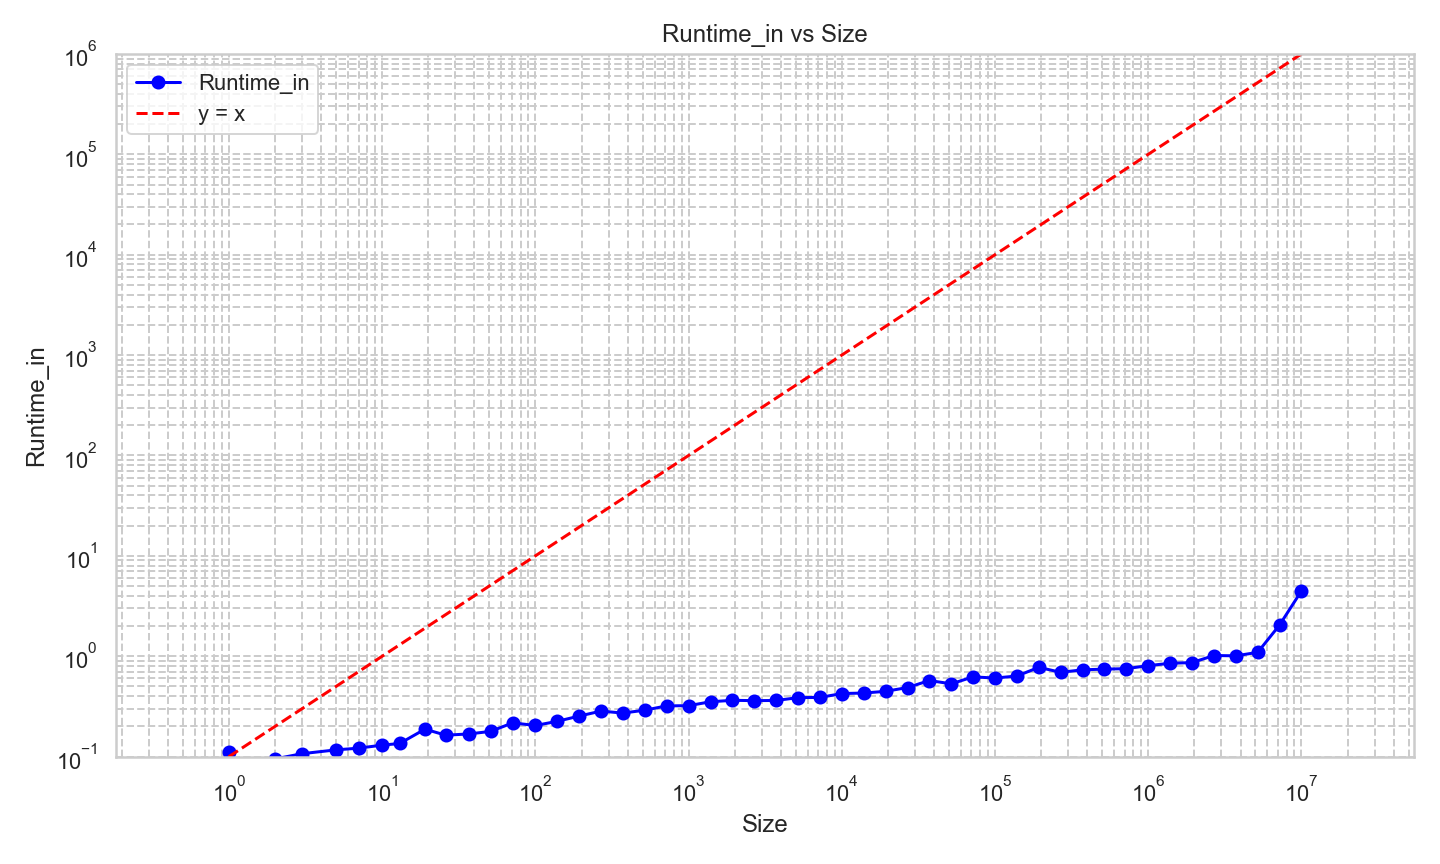

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming plot_data DataFrame is already defined

plt.figure(figsize=(10, 6))

# Plotting Runtime_in on a log-log scale
plt.loglog(plot_data['size'], plot_data['Runtime_in'], label='Runtime_in', color='blue', marker='o')

# Adding the abline
x_vals = np.array(plt.gca().get_xlim())
y_vals = np.power(10, np.log10(x_vals) + (-1)) # because y = 10^(log10(x) + intercept) for a log-log scale
plt.plot(x_vals, y_vals, '--', color='red', label='y = x')

# Setting labels, title, legend and axis limits
plt.xlabel('Size')
plt.ylabel('Runtime_in')
plt.title('Runtime_in vs Size')
plt.legend()

plt.grid(True, which="both", ls="--")
plt.ylim(1e-1, 1e6)

plt.tight_layout()
plt.show()

### Discussion

On the log-log plot:

1. The `in` operator (`__contains__` method) should demonstrate a logarithmic trend (`O(log n)`) for sufficiently large `n`, showing the graph starting to flatten as expected for a binary search tree. This is because, in a balanced BST, the time complexity for searching is `O(log n)`.

2. The `has_data` function will likely have a linear trend (`O(n)`) as it potentially checks every node in the tree. This means that, on our log-log plot, the line representing `has_data` should be steeper than the one for the `in` operator.

Comparing the two, the `in` operation is more efficient for checking if a specific patient_id is present in the tree. In contrast, the `has_data` function is less efficient since it needs to traverse potentially the entire tree to find a match by data. The performance difference becomes more pronounced as the size of the tree increases.

## Demonstrating the Time Complexity of Tree Setup

### Rationale:

Inserting an element into a balanced binary search tree (BST) ideally takes \(O(\log n)\) time. However, in the worst-case scenario, if the tree becomes skewed, it might take \(O(n)\) time for a single insertion. For \(n\) elements, the total time could theoretically range from \(O(n \log n)\) (for balanced trees) to \(O(n^2)\) (for skewed trees). In practice, the tree setup time should lie between these two bounds.

### Python Code Snippets:

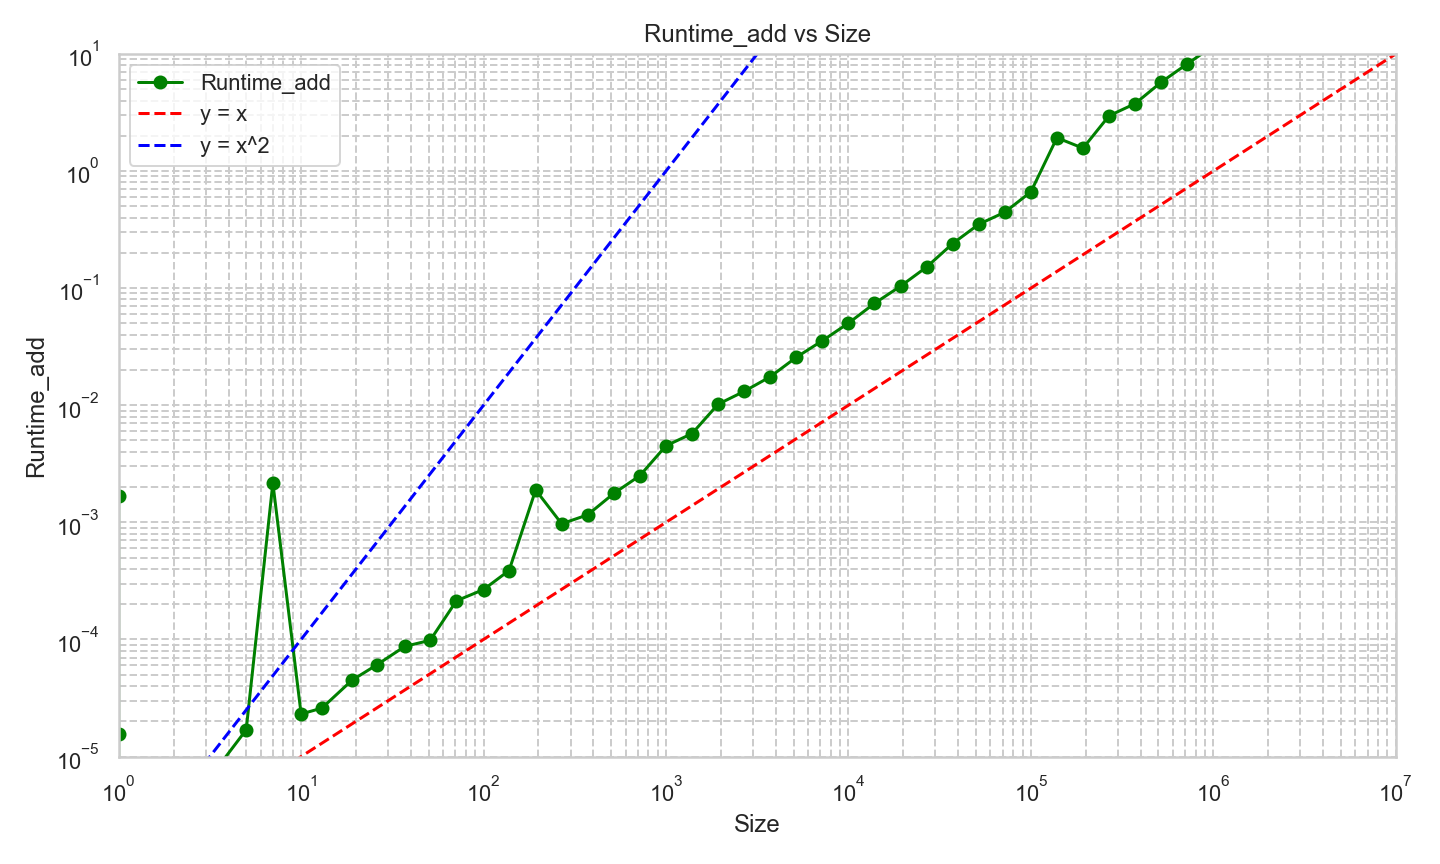

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming plot_data DataFrame is already defined

plt.figure(figsize=(10, 6))

# Plotting Runtime_add on a log-log scale
plt.loglog(plot_data['size'], plot_data['Runtime_add'], label='Runtime_add', color='green', marker='o')

# Adding the abline
x_vals = np.array(plt.gca().get_xlim())
y_vals = np.power(10, np.log10(x_vals) + (-6)) # because y = 10^(log10(x) + intercept) for a log-log scale
plt.plot(x_vals, y_vals, '--', color='red', label='y = x')

# Adding the quadratic line
y_quad = x_vals**2 * 1e-6 # adjust scaling if necessary
plt.plot(x_vals, y_quad, '--', color='blue', label='y = x^2')

# Setting labels, title, legend, and axis limits
plt.xlabel('Size')
plt.ylabel('Runtime_add')
plt.title('Runtime_add vs Size')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.xlim(1e0, 1e7)
plt.ylim(1e-5, 1e1)

plt.tight_layout()
plt.show()

### Results & Discussion:

The plotted graph shows the runtime of the tree setup against different tree sizes. As expected, the tree setup time lies between the \(O(n)\) and \(O(n^2)\) curves. This provides evidence supporting our claim that the tree setup has a time complexity of \(O(n \log n)\), as it does not surpass \(O(n^2)\) but grows faster than \(O(n)\).

## Unrepresentativeness of Using Constant Test Data

### Why Using `patient_id=1` is Unrepresentative:

1. **Skewed Trees**: In binary search trees (BST), the order of insertion matters. If you consistently start with the same `patient_id` value, the resultant tree structure might be skewed or biased. For instance, if subsequent `patient_id` values are larger than the first, you'll end up with a right-skewed tree.

2. **Best/Worst Case Scenario**: Constant data might inadvertently represent the best or worst-case scenario for the algorithm, leading to overly optimistic or pessimistic performance evaluations. For a BST, inserting elements in sorted order results in the worst-case time complexity. If `patient_id=1` starts a sequence of sorted insertions, it might make the tree perform at its worst.

3. **Lack of Diversity**: By only testing with `patient_id=1`, you're not considering other possible tree configurations or edge cases. This narrow testing can leave potential bugs undiscovered.

### Drawbacks of Using a Single Test Point:

1. **Limited Coverage**: Algorithms and data structures should be tested across a broad spectrum of scenarios to ensure their robustness. A single test point can't provide the variety needed to fully evaluate the behavior and performance.

2. **Missed Edge Cases**: Edge cases—situations that occur at the "extremes" of possible input scenarios—are vital for thorough testing. Relying on a single test point means many edge cases will be overlooked.

3. **Performance Bias**: If we're analyzing runtime or efficiency using a single point, our conclusions might be biased. For instance, in a BST, the depth where a `patient_id` resides affects the search time. One test point won't provide a comprehensive view of average or typical performance.

### Conclusion:

Diverse and comprehensive testing is crucial for accurate evaluations. Solely relying on `patient_id=1` or a single test point doesn't provide a complete picture and might lead to unrepresentative conclusions. For robust assessments, it's essential to employ varied test data and multiple test points.
